In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import nipy
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
base_dir = os.getcwd()

In [58]:
print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['.DS_Store', 'test1', 'test1.zip', 'train', '.ipynb_checkpoints', 'first_tester.ipynb', 'train.zip']


In [59]:
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train')[:10])


Contents of train directory:
['dog.8011.jpg', 'cat.5077.jpg', 'dog.7322.jpg', 'cat.2718.jpg', 'cat.10151.jpg', 'cat.3406.jpg', 'dog.1753.jpg', 'cat.4369.jpg', 'cat.7660.jpg', 'dog.5535.jpg']


In [60]:
print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/test1')[:10])


Contents of test directory:
['9733.jpg', '63.jpg', '6400.jpg', '823.jpg', '4217.jpg', '3578.jpg', '10321.jpg', '2666.jpg', '5109.jpg', '11981.jpg']


In [61]:
train_val_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test1')

train_val_data = os.listdir(train_val_dir)
test_data = os.listdir(test_dir)

In [62]:
labels = []

for filename in train_val_data:
    if os.path.getsize(os.path.join(train_val_dir, filename)) != 0:
        if "cat" in filename:
            labels.append("cat")
        elif "dog" in filename:
            labels.append("dog")

df_train_val = pd.DataFrame({
    'Filename': train_val_data,
    'Label': labels
})

df_train_val.head()

,Filename,Label
0,dog.8011.jpg,dog
1,cat.5077.jpg,cat
2,dog.7322.jpg,dog
3,cat.2718.jpg,cat
4,cat.10151.jpg,cat


In [63]:
df_train_val.info

<bound method DataFrame.info of             Filename Label
0       dog.8011.jpg   dog
1       cat.5077.jpg   cat
2       dog.7322.jpg   dog
3       cat.2718.jpg   cat
4      cat.10151.jpg   cat
...              ...   ...
24995   dog.8008.jpg   dog
24996   dog.1992.jpg   dog
24997  dog.12412.jpg   dog
24998   cat.2701.jpg   cat
24999  cat.10148.jpg   cat

[25000 rows x 2 columns]>

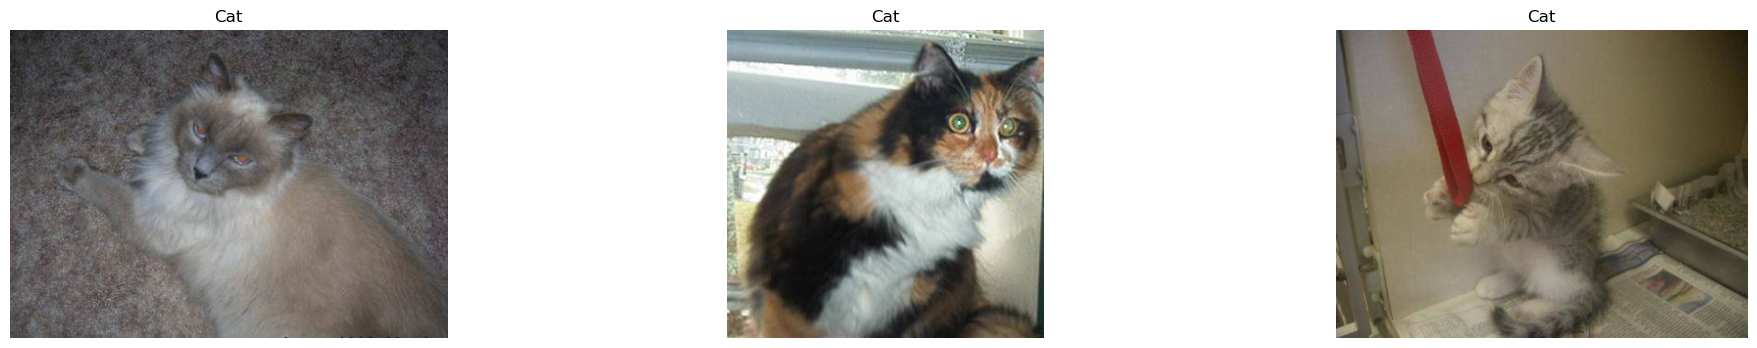

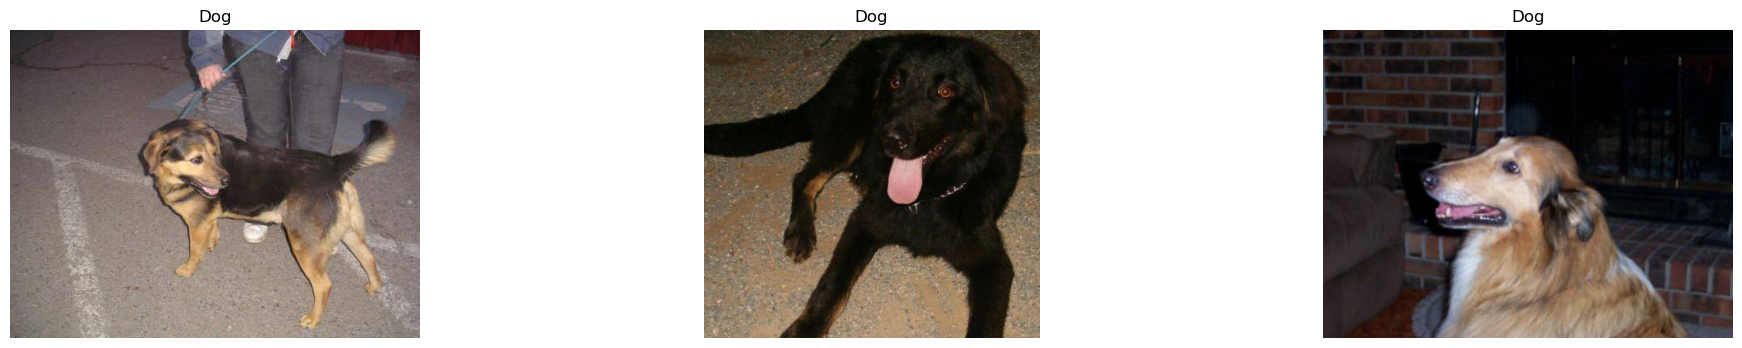

In [64]:
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg

def display_images(image_paths, category):
    plt.figure(figsize=(24, 4))  
    for i, img_path in enumerate(image_paths):
        plt.subplot(1, 3, i + 1)  
        img = mpimg.imread(os.path.join('train', img_path)) 
        plt.imshow(img)  
        plt.title(category)  
        plt.axis('off')  
    plt.show()  

cat_images = [filename for filename in train_val_data if 'cat' in filename]
dog_images = [filename for filename in train_val_data if 'dog' in filename]

selected_cat_images = random.sample(cat_images, 3)
selected_dog_images = random.sample(dog_images, 3)

display_images(selected_cat_images, 'Cat')
display_images(selected_dog_images, 'Dog')


In [65]:
df_train, df_val = train_test_split(df_train_val, test_size=0.2)

In [66]:
df_train_val.size

50000

In [67]:
df_train.size

40000

In [68]:
df_val.size

10000

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    directory=train_val_dir,
    x_col="Filename",
    y_col="Label",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

val_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    directory=train_val_dir,
    x_col="Filename",
    y_col="Label",
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary"
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [72]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    steps_per_epoch=len(train_generator),
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/15


2024-02-22 14:54:44.801162: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


625/625 [==============================] - 92s 146ms/step - loss: 0.5622 - accuracy: 0.7164 - val_loss: 0.4629 - val_accuracy: 0.7900
Epoch 2/15
625/625 [==============================] - 91s 145ms/step - loss: 0.5463 - accuracy: 0.7282 - val_loss: 0.4519 - val_accuracy: 0.7848
Epoch 3/15
625/625 [==============================] - 88s 141ms/step - loss: 0.5314 - accuracy: 0.7405 - val_loss: 0.4342 - val_accuracy: 0.7914
Epoch 4/15
625/625 [==============================] - 92s 148ms/step - loss: 0.5181 - accuracy: 0.7505 - val_loss: 0.4012 - val_accuracy: 0.8308
Epoch 5/15
625/625 [==============================] - 93s 149ms/step - loss: 0.5122 - accuracy: 0.7555 - val_loss: 0.4610 - val_accuracy: 0.7964
Epoch 6/15
625/625 [==============================] - 89s 143ms/step - loss: 0.5020 - accuracy: 0.7625 - val_loss: 0.4254 - val_accuracy: 0.8256
Epoch 7/15
625/625 [==============================] - 91s 146ms/step - loss: 0.4919 - accuracy: 0.7681 - val_loss: 0.4178 - val_accuracy: 0.8

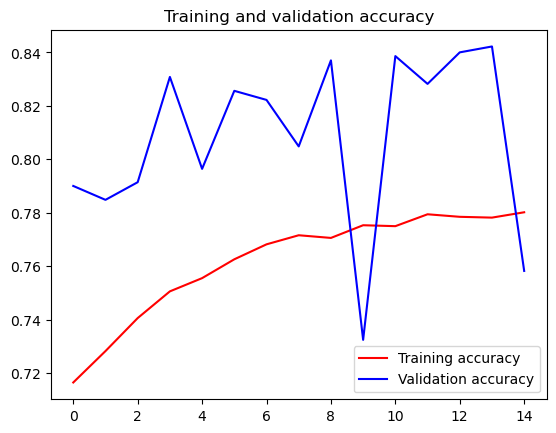

<Figure size 640x480 with 0 Axes>

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

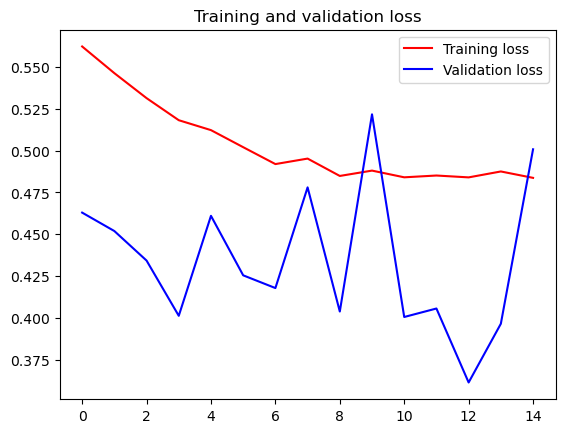

<Figure size 640x480 with 0 Axes>

In [74]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [75]:
df_test = pd.DataFrame({
    'Filename': test_data
})

df_test.head()

,Filename
0,9733.jpg
1,63.jpg
2,6400.jpg
3,823.jpg
4,4217.jpg


In [78]:
def modifytestimg(filename):
    img = mpimg.imread(os.path.join(test_dir, filename))
    test_img = cv2.resize(img, (150, 150))
    test_img = test_img.reshape(1, 150, 150, 3)
    prob = model.predict(test_img)
    if prob >= 0.5:
        return "Dog"
    else:
        return "Cat"

1/1 [==============================] - 0s 22ms/step


Text(0.5, 1.0, 'Dog')

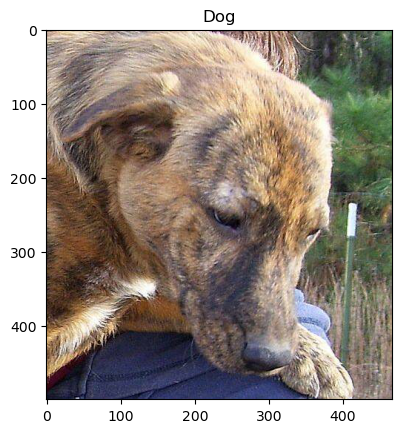

In [92]:
img = mpimg.imread(os.path.join(test_dir, "10000.jpg"))
plt.imshow(img)
plt.title(modifytestimg("10000.jpg"))

In [79]:
df_test["Label"] = df_test["Filename"].map(modifytestimg)

1/1 [==============================] - 0s 29ms/step


KeyboardInterrupt: 